Documentation:
- Created sub_df that holds rows with City feature value greater than 3
- No null values in the dataset
- Following graphs created:
    - Count of Startups based on Industry
    - Valuation vs Industry
    - Valuation vs City
- Pandas Profile Report generated

In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read the dataset
df = pd.read_csv('cleaned_unicorns_us_[data18].csv')

In [3]:
#first 5 rows of dataset
df.head()

,Unnamed: 0,Company,Valuation ($B),City,Industry,Select Investors
0,0,Stripe,95.0,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
1,1,SpaceX,74.0,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Instacart,39.0,San Francisco,"Supply chain, logistics,,delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
3,3,Epic Games,28.7,Cary,Other,"Tencent Holdings, KKR, Smash Ventures"
4,4,Databricks,28.0,San Francisco,"Data management,analytics","Andreessen Horowitz, New Enterprise Associates..."


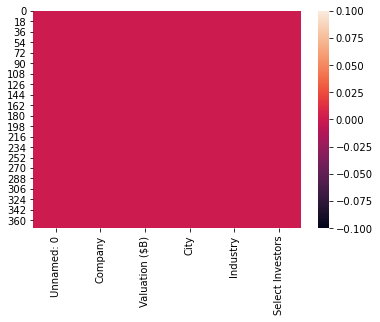

In [5]:
#heatmap to check for null values
sns.heatmap(df.isnull())

In [6]:
#using describe() to get an overview of the dataset
df.describe()

,Unnamed: 0,Valuation ($B)
count,374.000000,374.000000
mean,186.500000,3.215722
std,108.108742,7.072917
min,0.000000,1.000000
25%,93.250000,1.100000
50%,186.500000,1.600000
75%,279.750000,3.000000
max,373.000000,95.000000


In [7]:
#information about every column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        374 non-null    int64  
 1   Company           374 non-null    object 
 2   Valuation ($B)    374 non-null    float64
 3   City              374 non-null    object 
 4   Industry          374 non-null    object 
 5   Select Investors  374 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 17.7+ KB


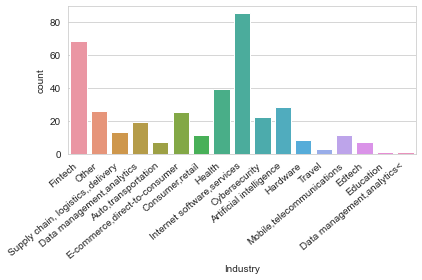

In [8]:
#Graph to find most common field of startups according to dataset
sns.set_style('whitegrid')
ax = sns.countplot(df['Industry'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

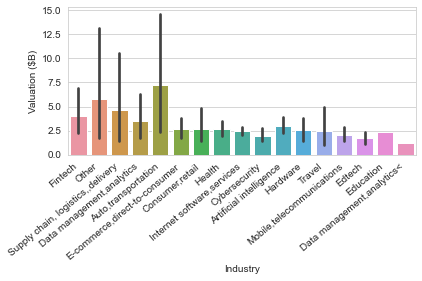

In [10]:
#Graph of Valuation vs Industry
ax1 = sns.barplot(data = df, x = 'Industry', y = 'Valuation ($B)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [40]:
df.head()

,Unnamed: 0,Company,Valuation ($B),City,Industry,Select Investors
0,0,Stripe,95.0,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
1,1,SpaceX,74.0,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Instacart,39.0,San Francisco,"Supply chain, logistics,,delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
3,3,Epic Games,28.7,Cary,Other,"Tencent Holdings, KKR, Smash Ventures"
4,4,Databricks,28.0,San Francisco,"Data management,analytics","Andreessen Horowitz, New Enterprise Associates..."


In [41]:
#Overview of contents of City column
df['City'].value_counts()

San Francisco       105
New York             55
Boston               13
Chicago              13
Mountain View        10
                   ... 
Bend                  1
Walnut                1
Portland              1
Colorado Springs      1
Philadelphia          1
Name: City, Length: 92, dtype: int64

In [12]:
#Removing rows whose City feature has a value less than 3 and saving in a sub_df
df.groupby('City').filter(lambda x : len(x)>3)
sub_df = df[df.groupby('City').City.transform('count')>3].copy() 

In [43]:
sub_df['City'].value_counts()

San Francisco    105
New York          55
Chicago           13
Boston            13
Mountain View     10
Redwood City       9
Palo Alto          9
San Jose           8
San Mateo          7
Sunnyvale          7
Seattle            6
Atlanta            5
El Segundo         5
Los Angeles        5
Austin             4
Santa Clara        4
San Diego          4
Name: City, dtype: int64

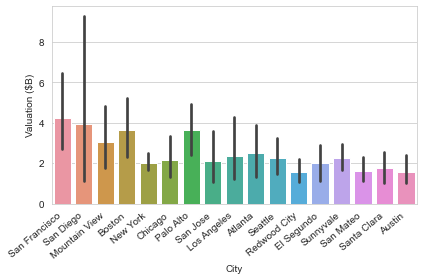

In [14]:
#Graph of Valuation vs City based on sub_df
ax2 = sns.barplot(data = sub_df, x = 'City', y = 'Valuation ($B)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [15]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248501 sha256=54c7cc11f2063adfe8b8747d56a26033825ab83e482043fc93926f7a8e8eacc5
  Stored in directory: /private/var/folders/j4/_nylm_3j3s10p1jgfzdkg4qw0000gn/T/pip-ephem-wheel-cache-mq96u5z9/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
Successfully built pandas-profiling
You should consider upgrading via the '/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [16]:
from pandas_profiling import ProfileReport

In [17]:
profile= ProfileReport( df, title= "cleaned_unicorns_us_[data18].csv", html={'style' : {'full_width' : True}})

In [51]:
profile.to_notebook_iframe()